**Retail Sales and Customer Demographics Analysis using Synthetic Data. Carrying out Exploratory Data Analysis.**

**1. Importing Libraries**

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Retail_Sales = pd.read_csv('/content/retail_sales_dataset.csv')

In [ ]:
Retail_Sales

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,5/16/2023,CUST996,Male,62,Clothing,1,50,50
996,997,11/17/2023,CUST997,Male,52,Beauty,3,30,90
997,998,10/29/2023,CUST998,Female,23,Beauty,4,25,100
998,999,12/5/2023,CUST999,Female,36,Electronics,3,50,150


In [ ]:
# Copying data to a new dataframe to save original data
Retail_Sales_data = Retail_Sales

**2. Data Cleaning**


In [ ]:
# Number of Rows and Columns
Retail_Sales.shape

(1000, 9)

In [ ]:
# Datatype of Data Columns
print(Retail_Sales.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


Date and Transaction ID have wrong datatypes

In [ ]:
# Convert 'Date' column to datetime data
Retail_Sales['Date'] = pd.to_datetime(Retail_Sales['Date'])

In [ ]:
# Convert 'Transaction ID' to string data
Retail_Sales['Transaction ID'] = Retail_Sales['Transaction ID'].astype(str)

In [ ]:
# Convert 'Total Amount' to currency format (string)
Retail_Sales['Total Amount (Currency)'] = Retail_Sales['Total Amount'].apply(lambda x: f'${x:,.2f}')

In [ ]:
print(Retail_Sales.dtypes)

Transaction ID                     object
Date                       datetime64[ns]
Customer ID                        object
Gender                             object
Age                                 int64
Product Category                   object
Quantity                            int64
Price per Unit                      int64
Total Amount                        int64
YearMonth                       period[M]
Total Amount (Currency)            object
dtype: object


In [ ]:
# Display the updated table
Retail_Sales

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,YearMonth,Total Amount (Currency)
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11,$150.00
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02,"$1,000.00"
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01,$30.00
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05,$500.00
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05,$100.00
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023-05,$50.00
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023-11,$90.00
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023-10,$100.00
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023-12,$150.00


The Total Amount (Currency) column displays the data as a string instead of an integer which can't be used in analysis.

In [ ]:
# check if there are null values
print(Retail_Sales.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


There are no null/missing values

**3. Data Analysis**

In [ ]:
# computing basic statistics
print (Retail_Sales.describe())

                                Date         Age     Quantity  Price per Unit  \
count                           1000  1000.00000  1000.000000     1000.000000   
mean   2023-07-03 00:25:55.200000256    41.39200     2.514000      179.890000   
min              2023-01-01 00:00:00    18.00000     1.000000       25.000000   
25%              2023-04-08 00:00:00    29.00000     1.000000       30.000000   
50%              2023-06-29 12:00:00    42.00000     3.000000       50.000000   
75%              2023-10-04 00:00:00    53.00000     4.000000      300.000000   
max              2024-01-01 00:00:00    64.00000     4.000000      500.000000   
std                              NaN    13.68143     1.132734      189.681356   

       Total Amount  
count   1000.000000  
mean     456.000000  
min       25.000000  
25%       60.000000  
50%      135.000000  
75%      900.000000  
max     2000.000000  
std      559.997632  


From the summary statistics above, it can be seen that:
The youngest customer is 18 years old while the oldest customer is 64. The average age of customers is 41 years. The average sales revenue made is $456.

In [ ]:
# Exclude non-numeric columns from numerical operations in order to carry out a correlation analysis.
numeric_data = Retail_Sales.select_dtypes(include=['int64'])

In [ ]:
# Construct a correlation matrix
correlation_matrix=numeric_data.corr()
correlation_matrix

,Age,Quantity,Price per Unit,Total Amount
Age,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.060568,0.373707,0.851925,1.000000


The total sales amount and the price per unit show a strong correlation of 0.851925. This is because the total sales amount generated by the company is dependent on the price per unit of product sold. In the same vein, the total amount sold shows a fairly strong correlation (0.373707) with the Quantity sold. The other parameters; Age and Quantity, Age and Price per unit as well as Age and Total amount sold show a weak correlation.

**4. Data Visualisation**

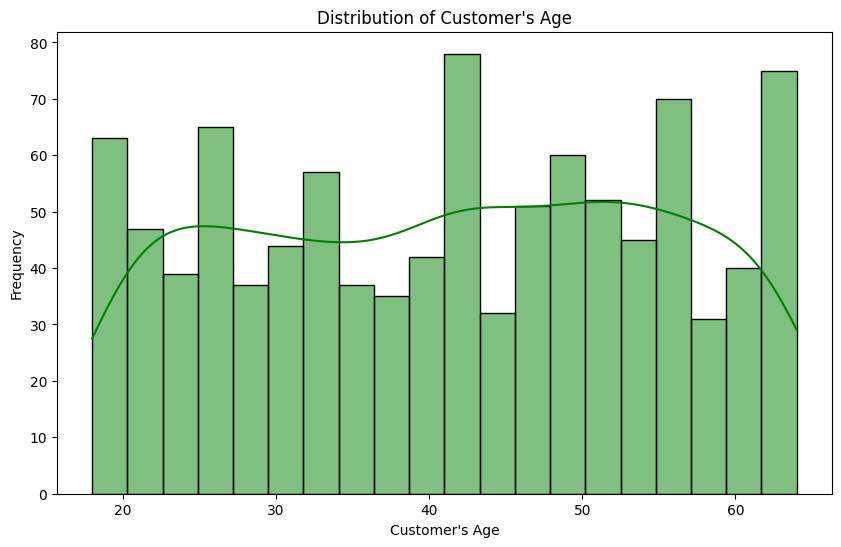

In [ ]:
# Descriptive Analysis - Histogram to show the distribution of age:
plt.figure(figsize=(10, 6))
sns.histplot(Retail_Sales['Age'], bins=20, color= 'green', kde=True)
plt.title("Distribution of Customer's Age")
plt.xlabel("Customer's Age")
plt.ylabel('Frequency')
plt.show()

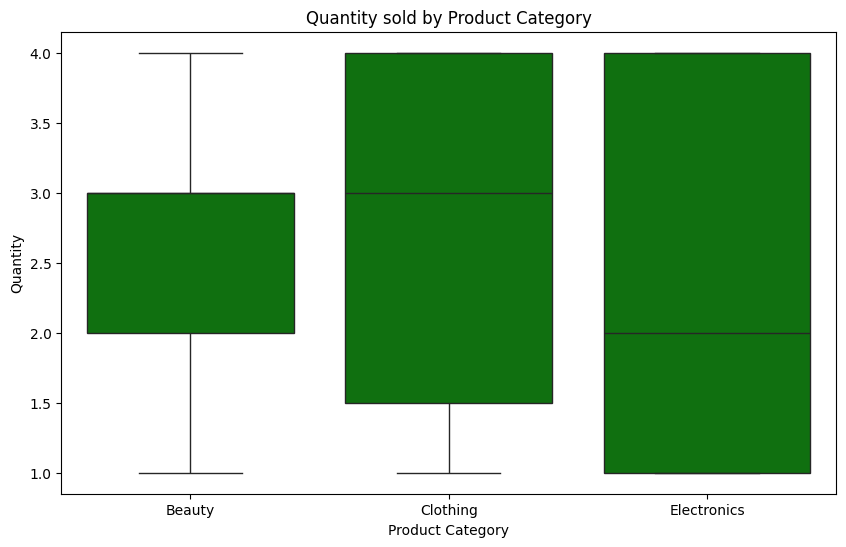

In [ ]:
# Boxplot of Quantity sold by Product Category
plt.figure(figsize=(10,6))
sns.boxplot(x='Product Category', y='Quantity', color='green', data=Retail_Sales)
plt.title('Quantity sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.show()

In [ ]:
# Plot pie chart to show gender distribution but first, calculate the count of each gender
Gender = Retail_Sales['Gender'].value_counts()
Gender

,count
Gender,
Female,510
Male,490


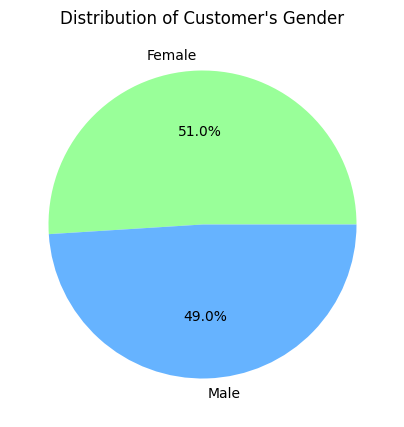

In [ ]:
# Then plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(Gender, labels=Gender.index, autopct='%1.1f%%', colors=['#99ff99','#66b3ff'])
plt.title("Distribution of Customer's Gender")
plt.show()

There slightly more female customers than male customers.

In [ ]:
#Plot a bar chart to show the averge revenue by gender
# First calculate the mean revenue by gender
AveRevenue_Gender = Retail_Sales.groupby('Gender')['Total Amount'].mean()

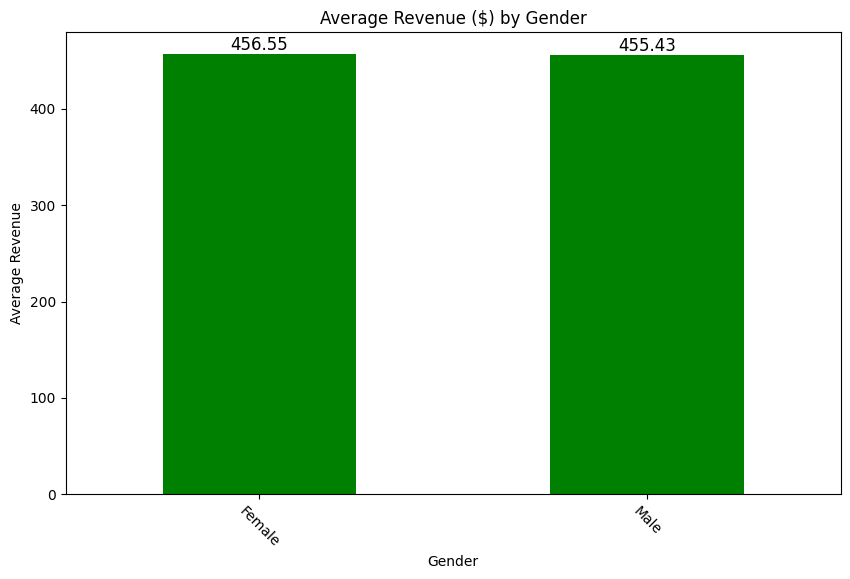

In [ ]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
AveRevenue_Gender.plot(kind='bar', color='green')
for i, value in enumerate(AveRevenue_Gender):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)
plt.title('Average Revenue ($) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Revenue')
plt.xticks(rotation=-45)
plt.show()

Male and female Customers generated similar average sales revenue.

In [ ]:
# Plot line chart to show revenue by age groups

# But first, calculate group the customers into different age groups
Age_groups = pd.cut(Retail_Sales['Age'], bins=range(15, 70, 5))
print(Age_groups)

0      (30, 35]
1      (25, 30]
2      (45, 50]
3      (35, 40]
4      (25, 30]
         ...   
995    (60, 65]
996    (50, 55]
997    (20, 25]
998    (35, 40]
999    (45, 50]
Name: Age, Length: 1000, dtype: category
Categories (10, interval[int64, right]): [(15, 20] < (20, 25] < (25, 30] < (30, 35] ... (45, 50] <
                                          (50, 55] < (55, 60] < (60, 65]]


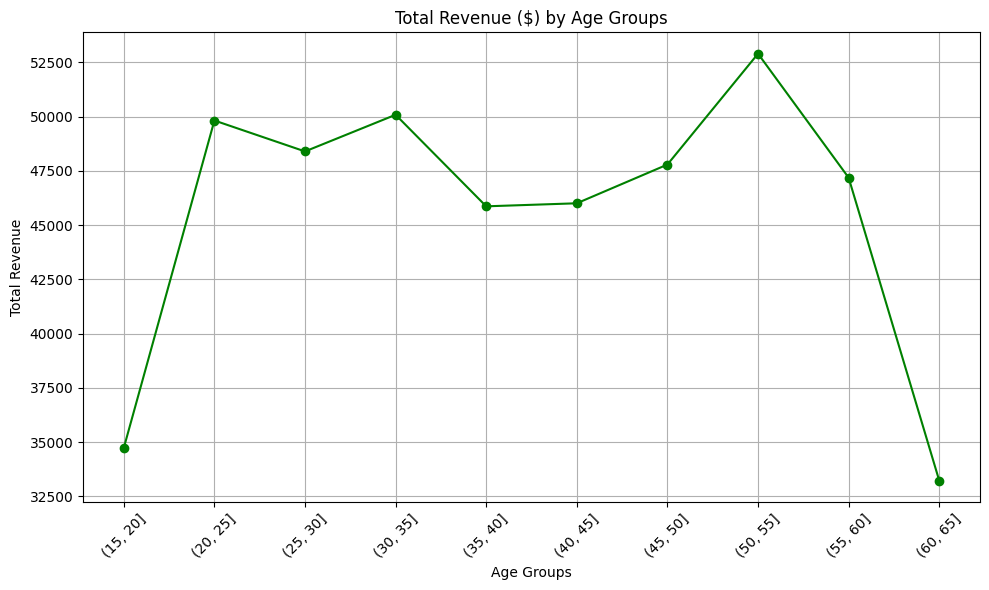

In [ ]:
# Create a line Chart showing Total Revenue by Age groups

TotalRevenue_Age = Retail_Sales.groupby(Age_groups, observed=True)['Total Amount'].sum()
plt.figure(figsize=(10, 6))
plt.plot(TotalRevenue_Age.index.astype(str), TotalRevenue_Age.values, marker='o', linestyle='-', color='g')

# Add title and labels
plt.title('Total Revenue ($) by Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Total Revenue')

# Show grid to ensure readability
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

The chart above dispicts that youngest (15-20) and the oldest (60-65) customers generated the least revenue and thus have the least spending power. Customers aged 50-55 generated the most revenue.

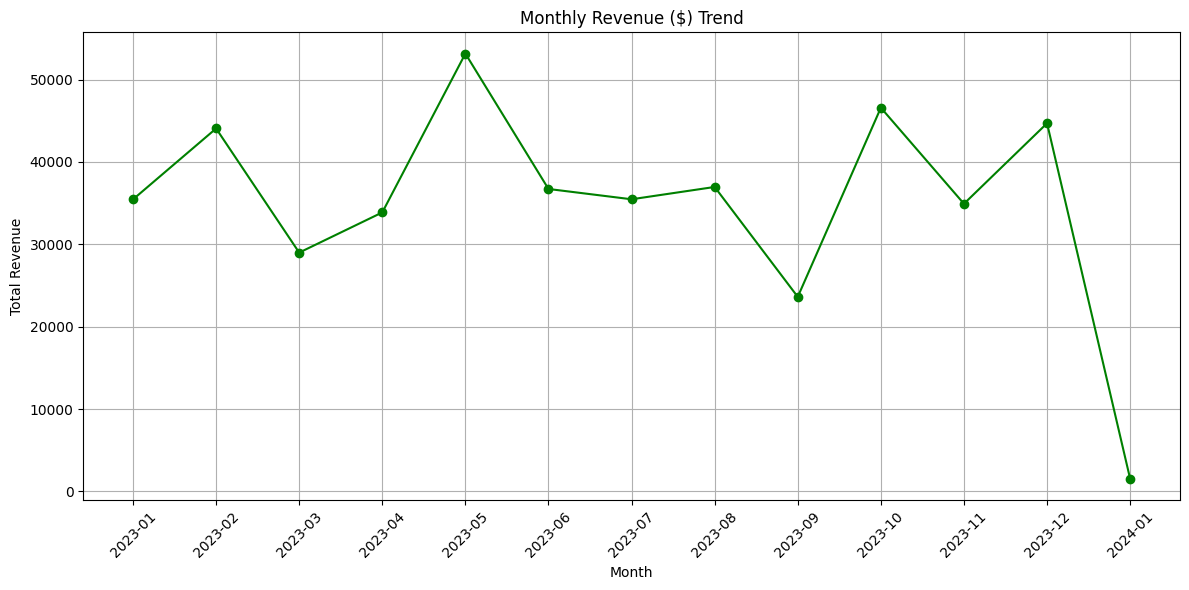

In [ ]:
# Creating a graph showing monthly revenue trend analysis
# Extract the month and year into a new column
Retail_Sales['YearMonth'] = Retail_Sales['Date'].dt.to_period('M')

# Group by the new 'YearMonth' column and sum the 'Total Amount'
monthly_revenue = Retail_Sales.groupby('YearMonth')['Total Amount'].sum()

# Convert the index to string for plotting
monthly_revenue.index = monthly_revenue.index.astype(str)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, color='green', marker='o', linestyle='-')

# Add titles and labels
plt.title('Monthly Revenue ($) Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

The highest sales revenue was generated in May 2023 while the lowest in September 2023. There was a huge dip in revenue to below 5,000 in January 2024 from about $45,000 in December 2023.

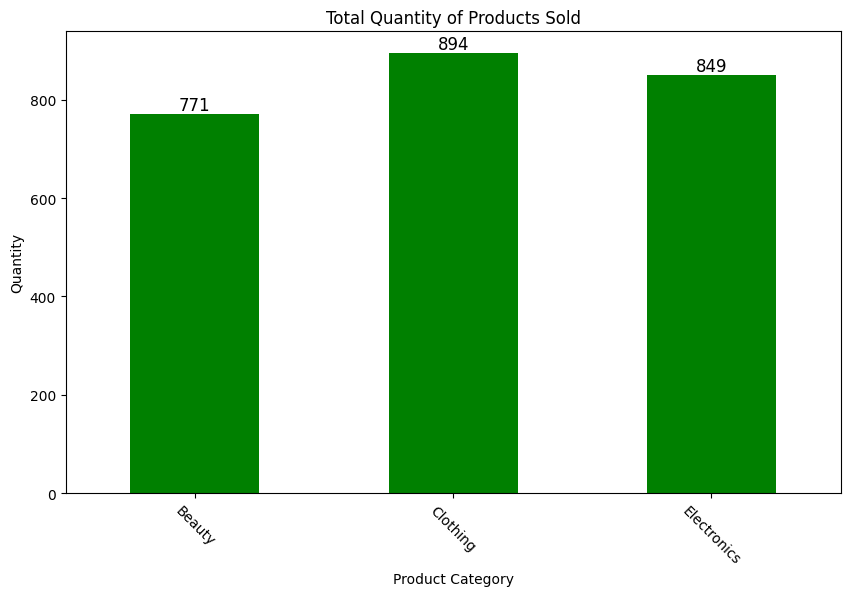

In [ ]:
# To create bar Chart - Total Quantity by Product Category
TotalQty_Product = Retail_Sales.groupby('Product Category')['Quantity'].sum()
plt.figure(figsize=(10, 6))
TotalQty_Product.plot(kind='bar', color='green')
for i, value in enumerate(TotalQty_Product):
    plt.text(i, value, f'{value:.0f}', ha='center', va='bottom', fontsize=12)
plt.title('Total Quantity of Products Sold')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.xticks(rotation=-45)
plt.show()

The chart shows that customers purchased more clothing products than electronics and Beauty within the sales period analysed.

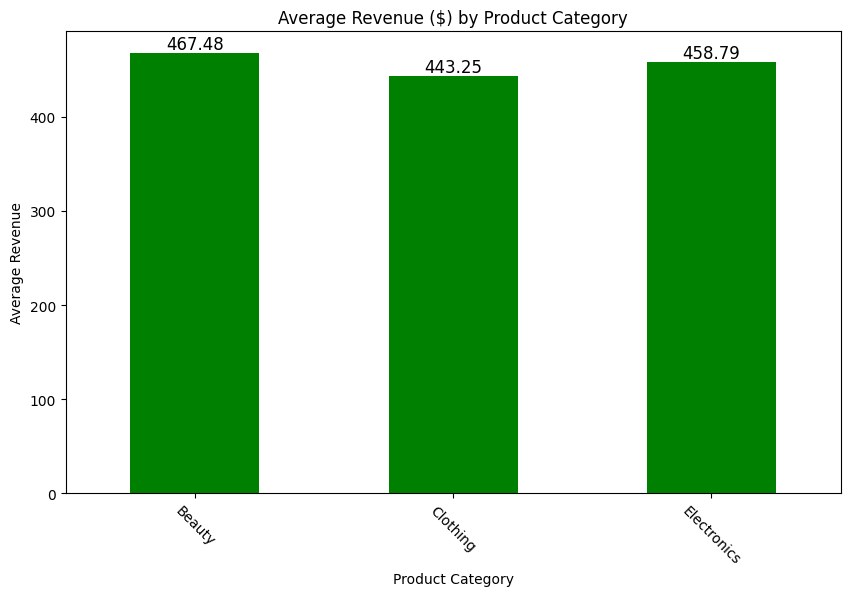

In [ ]:
# To create bar Chart - Average Revenue by Product Category
Ave_Revenue_product = Retail_Sales.groupby('Product Category')['Total Amount'].mean()
plt.figure(figsize=(10, 6))
Ave_Revenue_product.plot(kind='bar', color='green')
for i, value in enumerate(Ave_Revenue_product):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)
plt.title('Average Revenue ($) by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Revenue')
plt.xticks(rotation=-45)
plt.show()

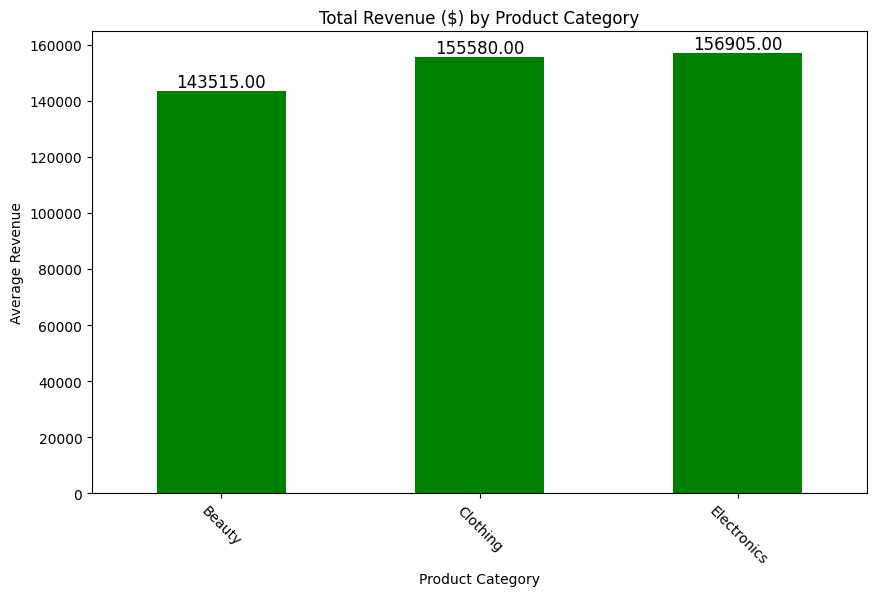

In [ ]:
# To create bar Chart - Total Revenue by Product Category:
T_Revenue_product = Retail_Sales.groupby('Product Category')['Total Amount'].sum()
plt.figure(figsize=(10, 6))
T_Revenue_product.plot(kind='bar', color='green')
for i, value in enumerate(T_Revenue_product):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)
plt.title('Total Revenue ($) by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Revenue')
plt.xticks(rotation=-45)
plt.show()

Although clothing was the category with the highest quantity purchased, electronics generated slightly higher sales revenue.

**5. Recommendations**


The Company can boost sales by:

*   Expanding the catalog of of its best selling product category - electronics to garner even more sales.

*  Carry out more marketing of beauty products especially to women aged 50-55 and expand the catalog of beauty products that cater to this age-group.

*   Include more products with lower price per unit that attract customers aged 15-20 and 60-65 who have lower purchasing power.


